In [1]:
import pathlib 
import os
import pandas as pd  
import random
from keras.preprocessing.image import img_to_array, load_img
from numpy import asarray, stack, concatenate, expand_dims, savez_compressed, zeros

In [2]:
def load_images(path, size=(128,128), n=1000):
    img_list = []
    filenames = []
    m = 0
    for file in os.listdir(path):
        pixels = load_img(os.path.join(path,file), target_size=size)
        pixels = img_to_array(pixels)
        img_list.append(pixels)
        filenames.append(file.rstrip('.jpg'))
        m += 1
        if m >= n:
            break
    return asarray(img_list),filenames

In [3]:
path = '../../../data/data/styles'
pixels, images = load_images(path)

In [4]:
images

['la_muse',
 'rain_princess',
 'the_scream',
 'the_shipwreck_of_the_minotaur',
 'udnie',
 'wave']

In [5]:
def gen_img_metric(root_path, style_fld, image_size, n):
    style_pixels, styles = load_images(os.path.join(root_path,style_fld))
    tr_list = []
    for style in styles:
        tr_pixels, _ = load_images(os.path.join(root_path, 'NIPS_'+style), size=image_size, n=n )
        tr_list.append(tr_pixels)
    trt_metrics = stack(tr_list, axis=0)
    return trt_metrics, style_pixels

In [6]:
def gen_gan_dataset(root_path, cnt_fld, style_fld, image_size=(128, 128), n=1000):
    cnt_pixels, fn = load_images(os.path.join(root_path, cnt_fld), size=image_size, n=n)
    print(f'content pixel metric shape : {cnt_pixels.shape}')
    tr_metrics, style_pixels = gen_img_metric(root_path, style_fld, image_size, n)
    print(f'style pixel metric shape : {style_pixels.shape}')
    print(f'tranfer metrics pixel metric shape : {tr_metrics.shape}')
    # wcnt_mat = concatenate([expand_dims(cnt_pixels, axis=0), tr_metrics], axis=0)
    # print(f'with content transfer metrics pixel metric shape : {wcnt_mat.shape}')
    # st_shape = list(style_pixels.shape)
    # st_shape[0] = 1
    # st_pix = concatenate([zeros(st_shape), style_pixels], axis=0)
    # print(f'padded style pixel metric shape : {st_pix.shape}')
    # full_mat = concatenate([expand_dims(st_pix, axis=1), wcnt_mat], axis=1)
    # print(f'final full metric shape : {full_mat.shape}')
    return cnt_pixels, style_pixels, tr_metrics

In [7]:
root = '../../../data/data/'
cnt_vec, style_vec, tr_vec = gen_gan_dataset(root,'NIPS_2017', 'styles')

content pixel metric shape : (1000, 128, 128, 3)
style pixel metric shape : (6, 128, 128, 3)
tranfer metrics pixel metric shape : (6, 1000, 128, 128, 3)


In [9]:
mat_file = '../../../data/data/comp_matrics.npz'
savez_compressed(mat_file, cotent=cnt_vec, style=style_vec, transfers=tr_vec)

In [5]:
import numpy as np 
np.random.randint(0, 20, 10)

array([16, 17, 17,  4, 12,  6, 10,  3, 19,  2])

In [26]:

def load_pixel_metrics(filename):
    full_mat = np.load(filename)
    style_pixels = (full_mat['style']-127.5)/127.5
    content_pixels = (full_mat['cotent']-127.5)/127.5
    transfer_mat  = (full_mat['transfers']-127.5)/127.5
    return style_pixels, content_pixels, transfer_mat

def generate_real_samples(dataset, n_samples, patch_shape):
    style, content, trans = dataset
    cnt_idxs = random.sample(range(style.shape[1]), n_samples)
    style_idxs = np.random.randint(0, style.shape[0], n_samples)
    mat_indx = zip(style_idxs, cnt_idxs)

    cnt_pixels = content[cnt_idxs]
    style_pixels = style[style_idxs]
    mat_pixels = trans[style_idxs, cnt_idxs, ...]
    return cnt_pixels, style_pixels, mat_pixels

In [18]:
file = '../../../data/data/comp_matrics.npz'
dataset = load_pixel_metrics(file)

In [15]:
style_pixels.shape

(6, 128, 128, 3)

In [27]:
cnt_pixels, style_pixels, mat_pixels = generate_real_samples(dataset, 10, 1)

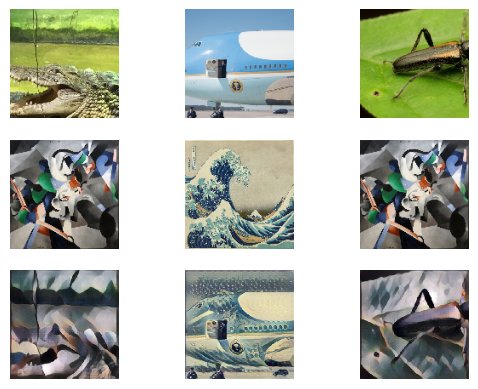

In [31]:
from matplotlib import pyplot
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow((cnt_pixels[i]*127.5 + 127.5).astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow((style_pixels[i]*127.5 + 127.5).astype('uint8'))
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + 2*n_samples + i)
	pyplot.axis('off')
	pyplot.imshow((mat_pixels[i]*127.5 + 127.5).astype('uint8'))
pyplot.show()